In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# Load the CSV dataset
chunksize = 1000
list_of_dataframes = []

for dfp in pd.read_csv('/home/administrator/dataset/CIC-IoT-2023/test_CICIoT2023.csv', chunksize=chunksize):
    list_of_dataframes.append(dfp)

df = pd.concat(list_of_dataframes)

In [40]:
# Calculate average bandwidth for each flow using Flow Duration
df['Bandwidth_Flow_Duration'] = df['Tot size'] / df['flow_duration']

# Convert bandwidth from bytes per second to gigabytes per second
df['Bandwidth_Flow_Duration'] /= (1024 * 1024 * 1024)  # dividing each value by 1024^3

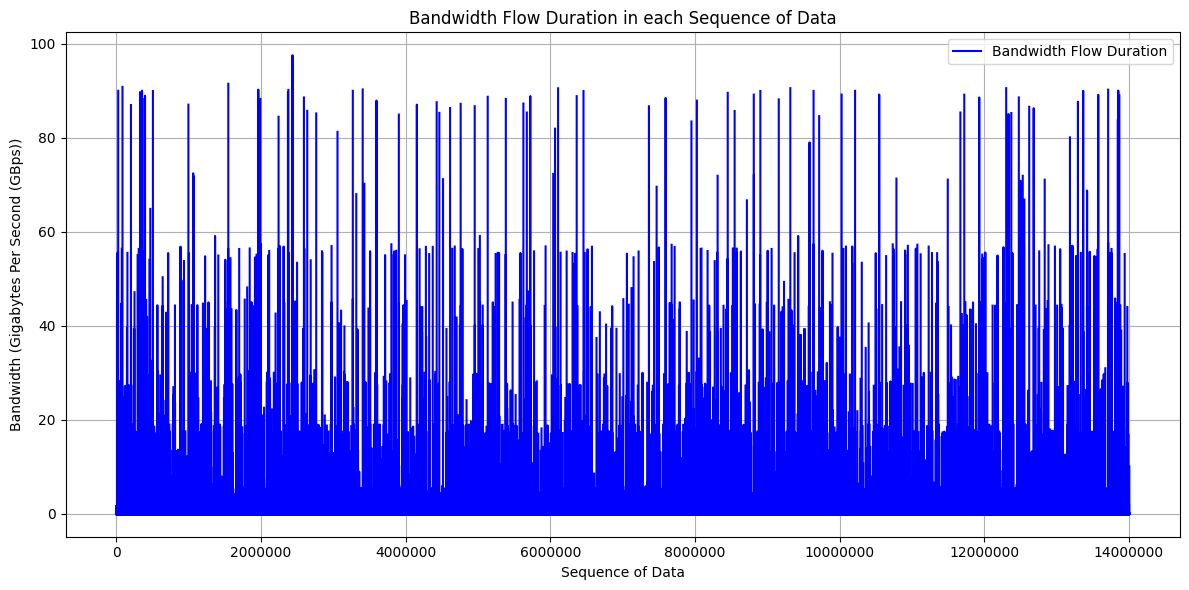

In [54]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
plt.ticklabel_format(style='plain')

# Plot average bandwidth using Flow Duration
axes.plot(df['Bandwidth_Flow_Duration'], label='Bandwidth Flow Duration', color='blue')
axes.set_title('Bandwidth Flow Duration in each Sequence of Data')
axes.set_xlabel('Sequence of Data')
axes.set_ylabel('Bandwidth (Gigabytes Per Second (GBps))')  # updated ylabel to reflect conversion
axes.legend()
axes.grid(True)

# Define function to format y-axis ticks with commas for numbers with five or more digits
def format_with_commas(x, pos):
    return '{:,.0f}'.format(x)

axes.yaxis.set_major_formatter(FuncFormatter(format_with_commas))

plt.tight_layout()
plt.show()

In [42]:
# Model size in GB
model_size_kb = 46
model_size_gb = model_size_kb / (1024 ** 2)

# Number of devices in each layer
num_edge_devices = 5
num_fog_devices = 5
num_total_edge_devices_cloud_centric = 25  # For cloud-centric architecture

# Distribute bandwidth among devices
bandwidth_edge_to_fog = df['Bandwidth_Flow_Duration'] / num_edge_devices
bandwidth_fog_to_cloud = df['Bandwidth_Flow_Duration'] / num_fog_devices
bandwidth_edge_to_cloud = df['Bandwidth_Flow_Duration'] / num_total_edge_devices_cloud_centric

# Time taken for communication (in seconds)
time_edge_to_fog = model_size_gb / bandwidth_edge_to_fog
time_fog_to_cloud = model_size_gb / bandwidth_fog_to_cloud
time_edge_to_cloud = model_size_gb / bandwidth_edge_to_cloud

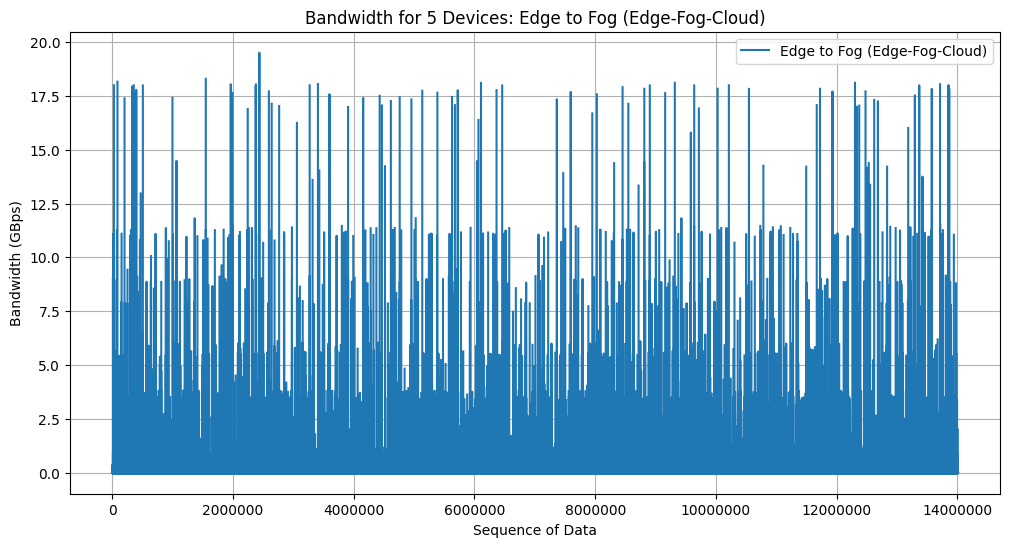

In [44]:
# Plotting latency for Edge-Fog-Cloud Architecture: Edge to Fog
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain')
plt.plot(df.index, bandwidth_edge_to_fog, label='Edge to Fog (Edge-Fog-Cloud)')
plt.xlabel('Sequence of Data')
plt.ylabel('Bandwidth (GBps)')
plt.title('Bandwidth for 5 Devices: Edge to Fog (Edge-Fog-Cloud)')
plt.legend()
plt.grid(True)
plt.show()

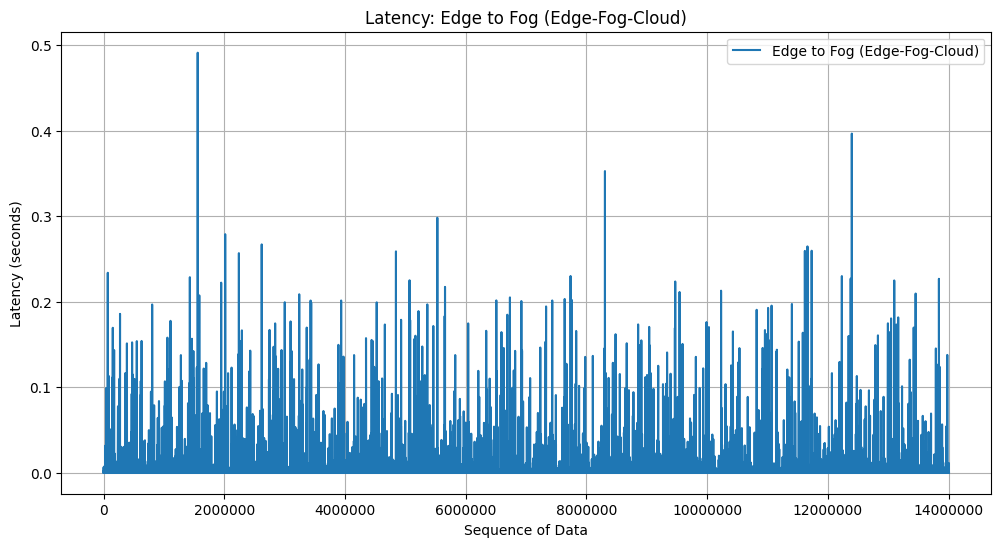

In [47]:
# Plotting latency for Edge-Fog-Cloud Architecture: Edge to Fog
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain')
plt.plot(df.index, time_edge_to_fog / 1000000000, label='Edge to Fog (Edge-Fog-Cloud)')
plt.xlabel('Sequence of Data')
plt.ylabel('Latency (seconds)')
plt.title('Latency: Edge to Fog (Edge-Fog-Cloud)')
plt.legend()
plt.grid(True)
plt.show()

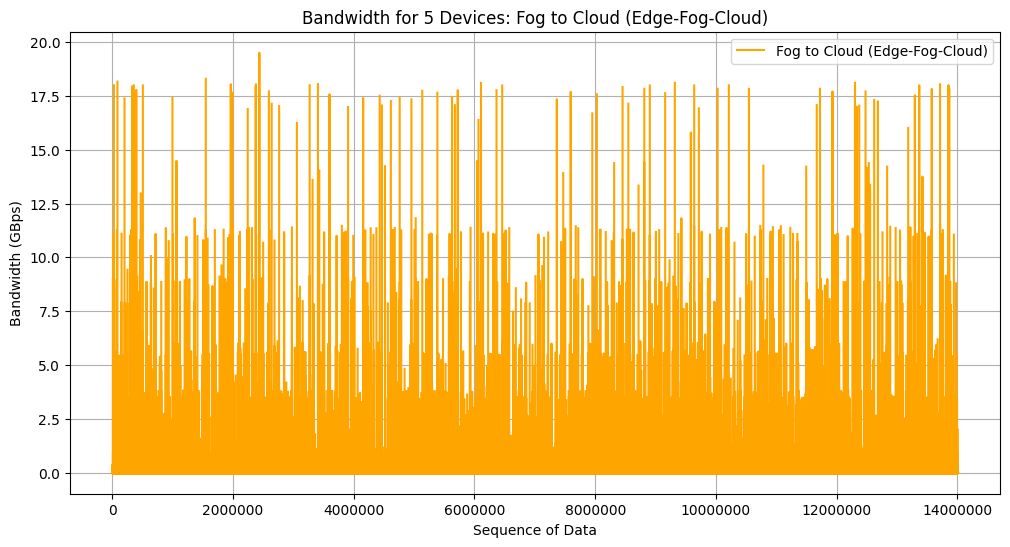

In [45]:
# Plotting latency for Edge-Fog-Cloud Architecture: Fog to Cloud
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain')
plt.plot(df.index, bandwidth_fog_to_cloud, label='Fog to Cloud (Edge-Fog-Cloud)', color='orange')
plt.xlabel('Sequence of Data')
plt.ylabel('Bandwidth (GBps)')
plt.title('Bandwidth for 5 Devices: Fog to Cloud (Edge-Fog-Cloud)')
plt.legend()
plt.grid(True)
plt.show()

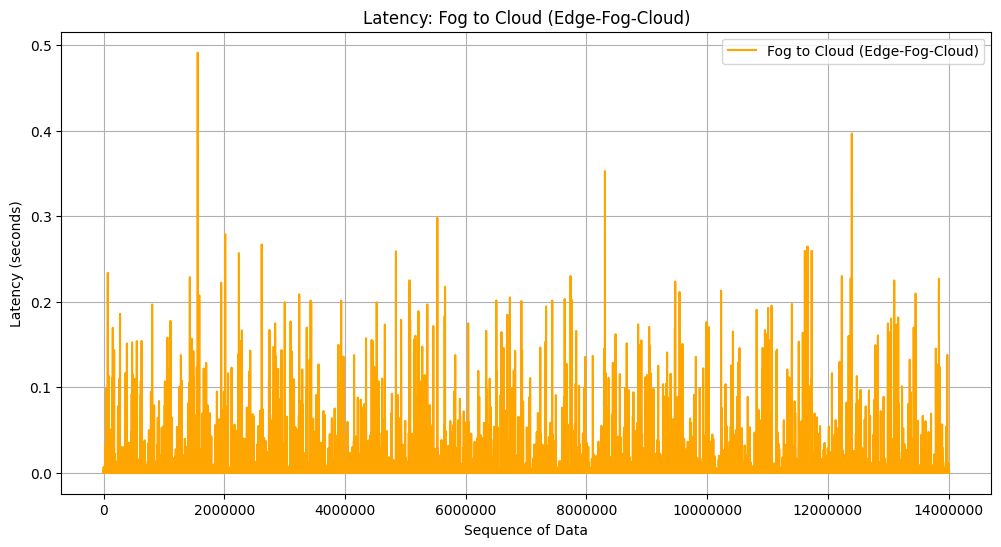

In [48]:
# Plotting latency for Edge-Fog-Cloud Architecture: Fog to Cloud
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain')
plt.plot(df.index, time_fog_to_cloud / 1000000000, label='Fog to Cloud (Edge-Fog-Cloud)', color='orange')
plt.xlabel('Sequence of Data')
plt.ylabel('Latency (seconds)')
plt.title('Latency: Fog to Cloud (Edge-Fog-Cloud)')
plt.legend()
plt.grid(True)
plt.show()

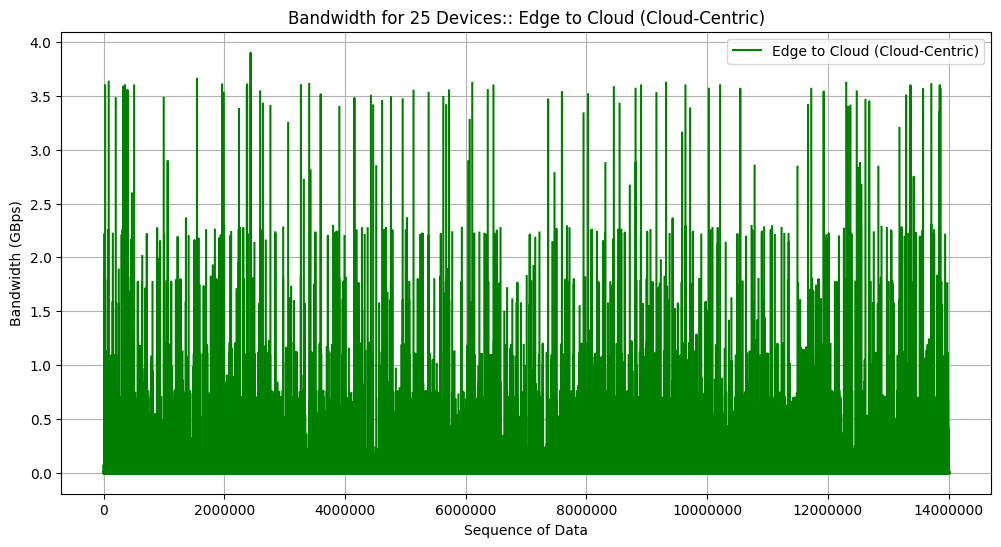

In [51]:
# Plotting latency for Cloud-Centric Architecture: Edge to Cloud
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain')
plt.plot(df.index, bandwidth_edge_to_cloud, label='Edge to Cloud (Cloud-Centric)', color='green')
plt.xlabel('Sequence of Data')
plt.ylabel('Bandwidth (GBps)')
plt.title('Bandwidth for 25 Devices:: Edge to Cloud (Cloud-Centric)')
plt.legend()
plt.grid(True)
plt.show()

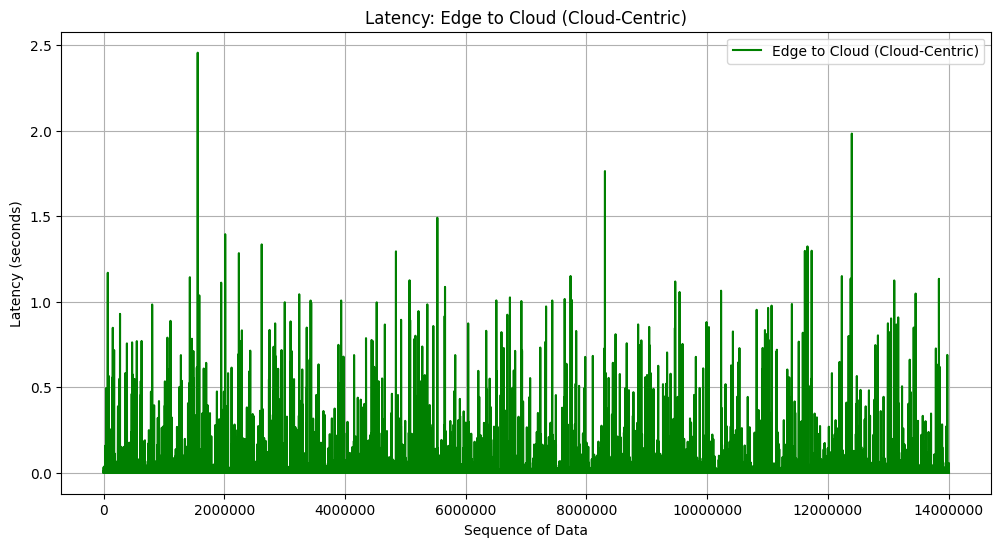

In [49]:
# Plotting latency for Cloud-Centric Architecture: Edge to Cloud
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain')
plt.plot(df.index, time_edge_to_cloud / 1000000000, label='Edge to Cloud (Cloud-Centric)', color='green')
plt.xlabel('Sequence of Data')
plt.ylabel('Latency (seconds)')
plt.title('Latency: Edge to Cloud (Cloud-Centric)')
plt.legend()
plt.grid(True)
plt.show()